# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 
from scipy.stats import linregress
import numpy as np
import random
import pprint

# Import API keys 
import sys
sys.path.append("..")
from api_keys import weather_api_key

# Import citipy
from citipy import citipy 

# Output CVS file 
data_file = "output_data/cities.csv"

# Range of latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Create an empty list for recording cities (latitude/longitude)
lat_lngs  = []
cities = []

# Create a loop to iterate through & append random cities 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lng)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)
        
    
print(len(cities))

622


In [3]:
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q=butaritari").json()
response
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 3.0707,
        "lon": 172.7902
    },
    "dt": 1619405418,
    "id": 2110227,
    "main": {
        "feels_like": 32.04,
        "grnd_level": 1008,
        "humidity": 73,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 28.45,
        "temp_max": 28.45,
        "temp_min": 28.45
    },
    "name": "Butaritari",
    "sys": {
        "country": "KI",
        "sunrise": 1619374811,
        "sunset": 1619418774
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "gust": 5.42,
        "speed": 5.17
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# loop through the cities 
city_name = []
latitude = []
longitude = []
max_temp = []
humidity  = []
cloudiness = []
wind_speed = []
countries = []
date = []
record_counter = 0
set_counter = 1

# Start of printing
print("Beginning Data Retrieval")
print("---------------------------------------")

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the cities

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if record_counter > 49:
            record_counter = 0
            set_counter = set_counter + 1
            
        else:
            record_counter = record_counter + 1
            
        print(f"Processing Records {record_counter} of Set {set_counter} | {city}")
        
    except: 
         print("City not found. Skipping...")
            
        
# End of printing
print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")



Beginning Data Retrieval
---------------------------------------
Processing Records 1 of Set 1 | rikitea
City not found. Skipping...
Processing Records 2 of Set 1 | tasiilaq
Processing Records 3 of Set 1 | vaini
Processing Records 4 of Set 1 | mar del plata
Processing Records 5 of Set 1 | tura
Processing Records 6 of Set 1 | puerto ayora
Processing Records 7 of Set 1 | chokurdakh
Processing Records 8 of Set 1 | donskoye
Processing Records 9 of Set 1 | kilindoni
Processing Records 10 of Set 1 | ust-nera
Processing Records 11 of Set 1 | punta arenas
Processing Records 12 of Set 1 | jamestown
Processing Records 13 of Set 1 | olafsvik
Processing Records 14 of Set 1 | mount isa
Processing Records 15 of Set 1 | ushuaia
Processing Records 16 of Set 1 | hilo
Processing Records 17 of Set 1 | northwich
Processing Records 18 of Set 1 | kiama
Processing Records 19 of Set 1 | kruisfontein
Processing Records 20 of Set 1 | ilulissat
Processing Records 21 of Set 1 | dikson
Processing Records 22 of Set

Processing Records 35 of Set 4 | lhokseumawe
City not found. Skipping...
Processing Records 36 of Set 4 | broome
Processing Records 37 of Set 4 | iqaluit
Processing Records 38 of Set 4 | bonavista
Processing Records 39 of Set 4 | grindavik
Processing Records 40 of Set 4 | lasa
Processing Records 41 of Set 4 | heihe
Processing Records 42 of Set 4 | tilichiki
City not found. Skipping...
Processing Records 43 of Set 4 | zhigansk
Processing Records 44 of Set 4 | zabaykalsk
Processing Records 45 of Set 4 | narsaq
Processing Records 46 of Set 4 | luderitz
Processing Records 47 of Set 4 | luba
Processing Records 48 of Set 4 | brae
Processing Records 49 of Set 4 | magnitogorsk
Processing Records 50 of Set 4 | coquimbo
Processing Records 0 of Set 5 | ginir
Processing Records 1 of Set 5 | pishva
Processing Records 2 of Set 5 | pacifica
Processing Records 3 of Set 5 | umm lajj
Processing Records 4 of Set 5 | taoudenni
Processing Records 5 of Set 5 | phan thiet
Processing Records 6 of Set 5 | chif

Processing Records 13 of Set 8 | algiers
Processing Records 14 of Set 8 | chandbali
Processing Records 15 of Set 8 | yulara
Processing Records 16 of Set 8 | batamshinskiy
Processing Records 17 of Set 8 | hailar
Processing Records 18 of Set 8 | ormara
Processing Records 19 of Set 8 | inhambane
Processing Records 20 of Set 8 | vilhena
Processing Records 21 of Set 8 | eureka
Processing Records 22 of Set 8 | yumen
Processing Records 23 of Set 8 | chapleau
City not found. Skipping...
Processing Records 24 of Set 8 | makakilo city
Processing Records 25 of Set 8 | zemio
Processing Records 26 of Set 8 | belmonte
Processing Records 27 of Set 8 | provost
City not found. Skipping...
Processing Records 28 of Set 8 | xocali
Processing Records 29 of Set 8 | bay roberts
Processing Records 30 of Set 8 | tazovskiy
Processing Records 31 of Set 8 | labuhan
Processing Records 32 of Set 8 | arlit
Processing Records 33 of Set 8 | ketchikan
Processing Records 34 of Set 8 | sigli
Processing Records 35 of Set 

Processing Records 40 of Set 11 | san borja
Processing Records 41 of Set 11 | aitape
Processing Records 42 of Set 11 | marawi
City not found. Skipping...
Processing Records 43 of Set 11 | sinegorskiy
Processing Records 44 of Set 11 | swan river
Processing Records 45 of Set 11 | dareda
Processing Records 46 of Set 11 | gunjur
City not found. Skipping...
Processing Records 47 of Set 11 | hearst
City not found. Skipping...
Processing Records 48 of Set 11 | makubetsu
Processing Records 49 of Set 11 | sawtell
City not found. Skipping...
Processing Records 50 of Set 11 | tiznit
Processing Records 0 of Set 12 | hofn
Processing Records 1 of Set 12 | nouadhibou
Processing Records 2 of Set 12 | langenburg
Processing Records 3 of Set 12 | vestmannaeyjar
Processing Records 4 of Set 12 | ampanihy
----------------------------------
Data Retrieval Complete
----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the DataFrame
df = pd.DataFrame({"City" : city_name,
                  "Lat" : latitude,
                  "Lng" : longitude,
                  "Max Temp" : max_temp,
                  "Humidity" : humidity,
                  "Cloudiness" : cloudiness,
                  "Wind Speed" : wind_speed,
                  "Country" : countries, 
                  "Date" : date})

df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,25.53,74,26,2.36,PF,1619405418
1,Tasiilaq,65.6145,-37.6368,4.00,65,75,7.20,GL,1619405419
2,Vaini,-21.2000,-175.2000,28.00,78,40,4.12,TO,1619405419
3,Mar del Plata,-38.0023,-57.5575,16.11,94,1,2.06,AR,1619405343
4,Tura,25.5198,90.2201,33.86,20,5,2.55,IN,1619405420
...,...,...,...,...,...,...,...,...,...
560,Hofn,64.2539,-15.2082,6.18,71,11,6.61,IS,1619405243
561,Nouadhibou,20.9310,-17.0347,18.00,88,0,6.17,MR,1619405512
562,Langenburg,49.2544,9.8458,3.00,70,43,5.14,DE,1619405512
563,Vestmannaeyjar,63.4427,-20.2734,6.96,81,1,2.55,IS,1619405512


In [6]:
# Export the city data into a .csv
df.to_csv("output_data/cities.csv", index = False)

In [7]:
# Display the DataFrame
df = pd.read_csv("output_data/cities.csv")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,25.53,74,26,2.36,PF,1619405418
1,Tasiilaq,65.6145,-37.6368,4.00,65,75,7.20,GL,1619405419
2,Vaini,-21.2000,-175.2000,28.00,78,40,4.12,TO,1619405419
3,Mar del Plata,-38.0023,-57.5575,16.11,94,1,2.06,AR,1619405343
4,Tura,25.5198,90.2201,33.86,20,5,2.55,IN,1619405420


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

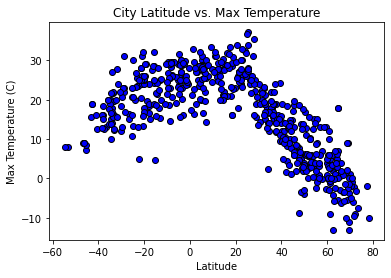

In [27]:
# Build a scatter plot 
plt.scatter(df["Lat"], df["Max Temp"], marker="o", facecolor="blue", edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("City Latitude vs Temperature.png")

# Show plot 
plt.show()

## Latitude vs. Humidity Plot

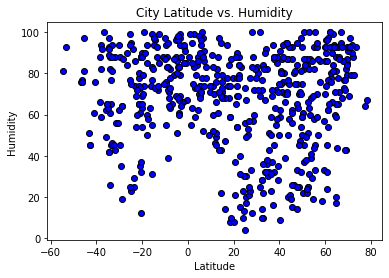

In [11]:
# Build a scatter plot 
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolor="blue", edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot 
plt.show()

## Latitude vs. Cloudiness Plot

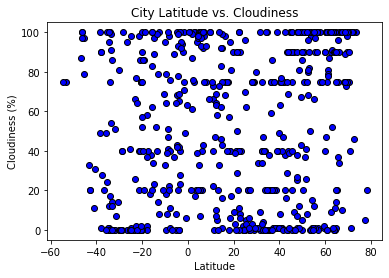

In [12]:
# Build a scatter plot 
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", facecolor="blue", edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot 
plt.show()

## Latitude vs. Wind Speed Plot

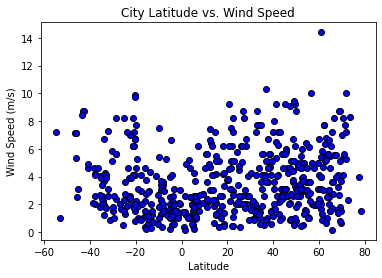

In [13]:
# Build a scatter plot 
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", facecolor="blue", edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot 
plt.show()

## Linear Regression

In [14]:
# split data into Northern and Southern hemisperes
northern_hemisphere = df[df["Lat"]>=0]
southern_hemisphere = df[df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.87


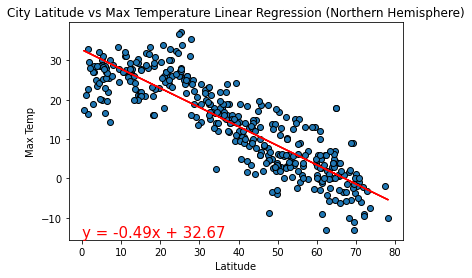

<Figure size 432x288 with 0 Axes>

In [15]:
# Defining x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Max Temperature Linear Regression (Northern Hemisphere).png")

There is a strong negative correlation between latitude and maximum temperature in the northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.62


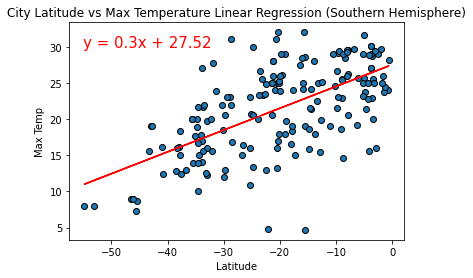

<Figure size 432x288 with 0 Axes>

In [16]:
# Defining x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Max Temperature Linear Regression (Southern Hemisphere).png")

There is a moderate positive correlation between latitude and maximum temperature for the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.07


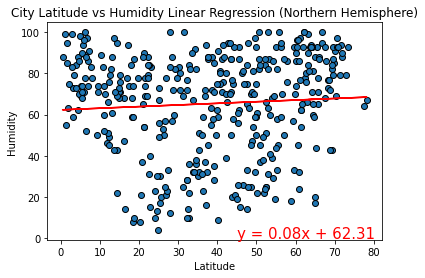

<Figure size 432x288 with 0 Axes>

In [17]:
# Defining x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,0),fontsize=15,color="red")
plt.title("City Latitude vs Humidity Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Humidity Linear Regression (Northern Hemisphere).png")

There is no correlation between latitude and humidity for the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.18


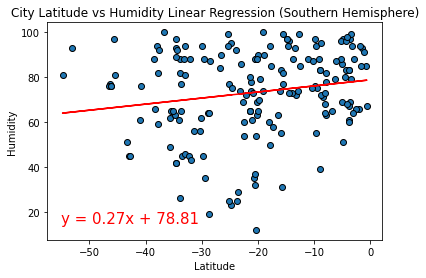

<Figure size 432x288 with 0 Axes>

In [18]:
# Defining x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("City Latitude vs Humidity Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Humidity Linear Regression (Southern Hemisphere).png")

There is a weak positive correlation between latitude and humidity for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.11


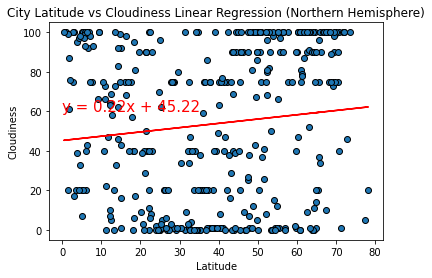

<Figure size 432x288 with 0 Axes>

In [20]:
# Defining x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.title("City Latitude vs Cloudiness Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Cloudiness Linear Regression (Northern Hemisphere).png")

There is a very weak positive between latitude and cloudiness for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.07


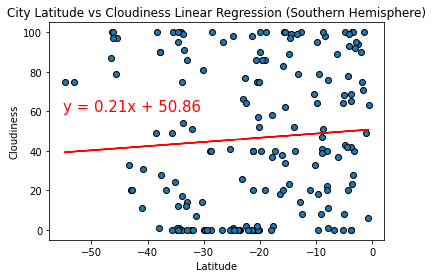

<Figure size 432x288 with 0 Axes>

In [21]:
# Defining x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.title("City Latitude vs Cloudiness Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Cloudiness Linear Regression (Southern Hemisphere).png")

There is no correlation between latitude and cloudiness for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.22


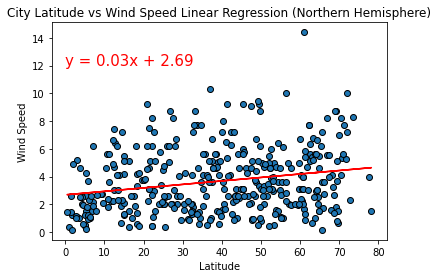

<Figure size 432x288 with 0 Axes>

In [23]:
# Defining x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.title("City Latitude vs Wind Speed Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Wind Speed Linear Regression (Northern Hemisphere).png")

There is a weak positive correlation between latitude and wind speed for the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.38


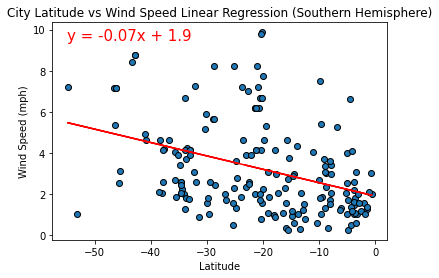

<Figure size 432x288 with 0 Axes>

In [26]:
# Defining x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# Calculating the correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
      
# Creating the plot and labelling 
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,9.5),fontsize=15,color="red")
plt.title("City Latitude vs Wind Speed Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
      
# Saving graph as .png
plt.savefig("output_data/City Latitude vs Wind Speed Linear Regression (Southern Hemisphere).png")

There is a moderate negative correlation between latitude and wind speed in the southern hemisphere. 